In [1]:
from nistats.first_level_model import FirstLevelModel

In [2]:
from nilearn.input_data import NiftiMasker

In [13]:
data = '/Users/gilles/data/hires/07/sub-012/av/sub-012_EPI07_run-1_bold_volreg_sg_psc_av.nii.gz'

mcf = '/Users/gilles/data/hires/07/sub-012/mcf/sub-012_EPI07_run-1_bold_volreg.nii.gz'

mean_img = '/Users/gilles/data/hires/07/sub-012/reg/example_func.nii.gz'

In [14]:
masker = NiftiMasker(mask_strategy='epi')
masker.fit(mean_img)

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=None, mask_strategy='epi', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [15]:
from nilearn import plotting

In [16]:
%matplotlib inline

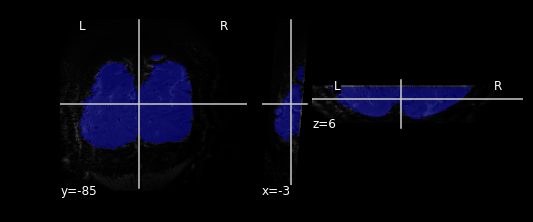

In [18]:
plotting.plot_roi(masker.mask_img_, mean_img)

In [19]:
import pandas

In [22]:
design_matrix = pandas.read_csv('design_matrix_resolution-070_run-1.tsv', sep='\t')

In [23]:
first_level_model = FirstLevelModel(4.0, hrf_model='glover + derivative', mask=masker.mask_img_)
first_level_model.fit(data, design_matrices=design_matrix[['constant', 'red', 'blue', 'drift_1']])

FirstLevelModel(drift_model='cosine', drift_order=1, fir_delays=[0],
        hrf_model='glover + derivative',
        mask=<nibabel.nifti1.Nifti1Image object at 0x11e3811d0>,
        memory=Memory(cachedir=None), memory_level=1, min_onset=-24,
        minimize_memory=True, n_jobs=1, noise_model='ar1', period_cut=128,
        signal_scaling=True, slice_time_ref=0.0, smoothing_fwhm=None,
        standardize=False, subject_label=None, t_r=4.0, target_affine=None,
        target_shape=None, verbose=0)

In [24]:
presentation = first_level_model.compute_contrast('red + blue')

In [29]:
presentation.to_filename('presentation_070.nii.gz')

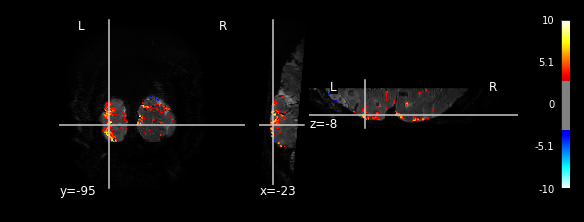

In [25]:
plotting.plot_stat_map(presentation, mean_img, threshold=3.1)

In [26]:
left_right = first_level_model.compute_contrast('red - blue')

In [28]:
left_right.to_filename('red_blue_070.nii.gz')

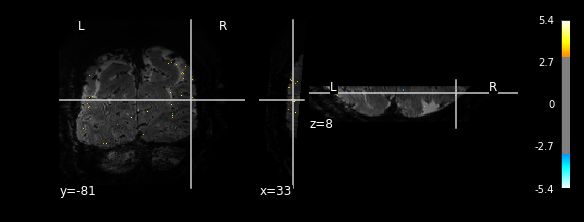

In [27]:
plotting.plot_stat_map(left_right, mean_img, threshold=3.1)

# Fixed effects

In [31]:
import glob

In [35]:
data = sorted(glob.glob('/Users/gilles/data/hires/07/sub-012/psc/sub-012_EPI07_run-*_bold_volreg_sg_psc.nii.gz'))
design_matrices = [pandas.read_csv(fn, sep='\t')[['red', 'blue', 'constant', 'drift_1']] for fn in sorted(glob.glob('design_matrix_resolution-070_run-*.tsv'))]

In [36]:
first_level_model.fit(data, design_matrices=design_matrices)

FirstLevelModel(drift_model='cosine', drift_order=1, fir_delays=[0],
        hrf_model='glover + derivative',
        mask=<nibabel.nifti1.Nifti1Image object at 0x11e3811d0>,
        memory=Memory(cachedir=None), memory_level=1, min_onset=-24,
        minimize_memory=True, n_jobs=1, noise_model='ar1', period_cut=128,
        signal_scaling=True, slice_time_ref=0.0, smoothing_fwhm=None,
        standardize=False, subject_label=None, t_r=4.0, target_affine=None,
        target_shape=None, verbose=0)

In [37]:
presentation = first_level_model.compute_contrast('red + blue')

/Users/gilles/anaconda3/lib/python3.6/site-packages/nistats-0.1.0-py3.6.egg/nistats/first_level_model.py:545: UserWarning: One contrast given, assuming it for all 5 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


In [38]:
presentation.to_filename('presentation_070_fe.nii.gz')

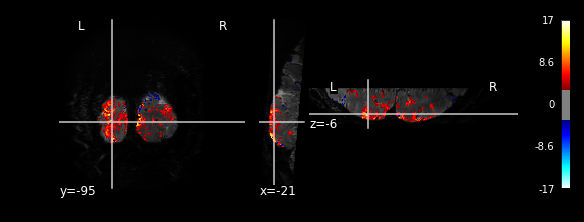

In [39]:
plotting.plot_stat_map(presentation, mean_img, threshold=3.1)

In [42]:
left_right = first_level_model.compute_contrast('red - blue')

/Users/gilles/anaconda3/lib/python3.6/site-packages/nistats-0.1.0-py3.6.egg/nistats/first_level_model.py:545: UserWarning: One contrast given, assuming it for all 5 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


In [43]:
left_right.to_filename('red_blue_070_fe.nii.gz')